In [66]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [251]:
# df = pd.read_excel('data/Syria_Tracker_Killings.xlsx', 'RowData')
# df.to_pickle('mid2015_df')
df = pd.read_pickle('mid2015_df')

In [545]:
df.dtypes

ID                            int64
Date                 datetime64[ns]
WeekDate             datetime64[ns]
MonthDate            datetime64[ns]
Age                           int64
Under18                        bool
Gender                       object
GenderAR                     object
GovernateEN                  object
GovernateAR                  object
GovernateID                   int64
Admin3EN                     object
Admin3AR                     object
Admin3ID                      int64
Cause of Death AR            object
Cause of Death EN            object
Death Category               object
Name                         object
Location                     object
Lat                         float64
Lon                         float64
PhotoLinks                   object
PhotoCaptions                object
VideoLinks                   object
VideoCaptions                object
Comment                      object
Last30                        int64
Last60                      

In [559]:
fusion = df[['Date', 'WeekDate', 'Gender', 'Admin3EN', 'Death Category', 'Lon', 'Lat']]
fusion.Gender = fusion.Gender.map({'Female': 0, 'Male':1})
fusion.to_csv('fusion.csv')

In [647]:
# totals, mean and standard dev by gender for the entire conflict
g = pd.concat([df['Death Category'], pd.get_dummies(df.Gender)], axis=1).groupby('Death Category')
death_types = g.agg([np.sum, np.mean, np.std])
female_death_types = death_types.Female.to_dict()

In [648]:
death_types

Female                       Male                    
                            sum      mean       std    sum      mean       std
Death Category                                                                
Air Bombardment            2559  0.232594  0.422505   8443  0.767406  0.422505
Artillery                  8294  0.195789  0.396811  34068  0.804211  0.396811
Asphyxiation                 11  0.239130  0.431266     35  0.760870  0.431266
Beating or Stabbing         127  0.155637  0.362733    689  0.844363  0.362733
Burned                       14  0.076087  0.265861    170  0.923913  0.265861
Chemical                    126  0.084564  0.278325   1364  0.915436  0.278325
Coalition Strikes            52  0.189781  0.392845    222  0.810219  0.392845
Crushed                       3  0.081081  0.276725     34  0.918919  0.276725
Execution                     2  0.142857  0.363137     12  0.857143  0.363137
Gun Shot                   2450  0.040424  0.196952  58158  0.959576  0.196952
ISIS                         26  0.038012  0.191364    658  0.961988  0.191364
Mine                          0  0.000000  0.000000     40  1.000000  0.000000
Missiles                     78  0.356164  0.479962    141  0.643836  0.479962
Other                         9  0.281250  0.456803     23  0.718750  0.456803
Refusal to Follow Orders      0  0.000000  0.000000   1104  1.000000  0.000000
Resource Outage             237  0.302296  0.459546    547  0.697704  0.459546
Sniper                      622  0.131141  0.337590   4121  0.868859  0.337590
Stress                       59  0.299492  0.459203    138  0.700508  0.459203
Torture                      84  0.010969  0.104163   7574  0.989031  0.104163
Unspecified                  19  0.292308  0.458362     46  0.707692  0.458362
Wounds                      128  0.128643  0.334973    867  0.871357  0.334973

In [649]:
df2 = pd.concat([df[['MonthDate', 'Death Category', 'Admin3EN']], pd.get_dummies(df.Gender)], axis=1)
g = df2.groupby(['MonthDate', 'Admin3EN', 'Death Category']).sum()
location_proportions = g.apply(lambda x: x / g.sum(axis=1)).reset_index()

# compares groupby sections to the proportions of the entire conflict
# shows where greater than mean plus one std dev
location_proportions['total_female_proportion_for_type'] = location_proportions['Death Category'].map(female_death_types['mean'])
location_proportions['total_female_stddev_for_type'] = location_proportions['Death Category'].map(female_death_types['std'])
location_proportions[location_proportions.Female > location_proportions.total_female_proportion_for_type + location_proportions.total_female_stddev_for_type]

,MonthDate,Admin3EN,Death Category,Female,Male,total_female_proportion_for_type,total_female_stddev_for_type
65,2011-04-01,Lattakia,Sniper,0.500000,0.500000,0.131141,0.337590
94,2011-05-01,As_Sanamayn,Gun Shot,0.470588,0.529412,0.040424,0.196952
123,2011-05-01,Homs,Sniper,0.500000,0.500000,0.131141,0.337590
139,2011-05-01,Masirib,Gun Shot,0.250000,0.750000,0.040424,0.196952
143,2011-05-01,Nawa,Resource Outage,1.000000,0.000000,0.302296,0.459546
149,2011-05-01,Tall_Kalakh,Sniper,1.000000,0.000000,0.131141,0.337590
151,2011-05-01,Tartous,Gun Shot,0.666667,0.333333,0.040424,0.196952
215,2011-07-01,Duma,Asphyxiation,1.000000,0.000000,0.239130,0.431266
220,2011-07-01,Hama,Asphyxiation,1.000000,0.000000,0.239130,0.431266
227,2011-07-01,Harak,Stress,1.000000,0.000000,0.299492,0.459203


In [253]:
df['admin_codes'] = df.Admin3EN.astype('category').cat.codes
df['epoch'] = df.MonthDate.astype(int) // 10**9

In [387]:
# expanded = pd.concat([df[['Admin3EN', 'MonthDate', 'Gender']], pd.get_dummies(df['Death Category'])], axis=1)

In [521]:
female = pd.get_dummies(df[df.Gender == 'Female']['Death Category'], prefix='Female')
male = pd.get_dummies(df[df.Gender == 'Male']['Death Category'], prefix='Male')

In [522]:
women = pd.concat([df.Gender, pd.get_dummies(df['Death Category'], prefix='women')], axis=1)
men = pd.concat([df.Gender, pd.get_dummies(df['Death Category'], prefix='men')], axis=1)

In [523]:
recombined = pd.concat([df[['Admin3EN', 'MonthDate']], women[women.Gender == 'Female'].drop('Gender', axis=1), men[men.Gender == 'Male'].drop('Gender', axis=1)], axis=1)

In [524]:
grouped = recombined.groupby(['Admin3EN', 'MonthDate']).sum()

In [525]:
grouped = grouped.fillna(0)

In [526]:
grouped.reset_index(inplace=True)

In [527]:
grouped.Admin3EN = grouped.Admin3EN.astype('category').cat.codes

In [528]:
grouped.MonthDate = grouped.MonthDate.astype(int) // 10**9

In [529]:
grouped

,Admin3EN,MonthDate,women_Air Bombardment,women_Artillery,women_Asphyxiation,women_Beating or Stabbing,women_Burned,women_Chemical,women_Coalition Strikes,women_Crushed,...,men_Mine,men_Missiles,men_Other,men_Refusal to Follow Orders,men_Resource Outage,men_Sniper,men_Stress,men_Torture,men_Unspecified,men_Wounds
0,0,1309478400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1320105600,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1322697600,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1328054400,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,0
4,0,1330560000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,0,1333238400,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6,0,1335830400,0,1,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
7,0,1338508800,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,1341100800,0,6,0,0,0,0,0,0,...,0,0,0,0,0,4,0,2,0,0
9,0,1343779200,12,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [530]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
plt.rcParams["figure.figsize"] = (12,8)

In [531]:
pca = PCA(n_components=2, whiten=True)

In [535]:
k = 4
# data = grouped.values
data = pca.fit_transform(grouped.values)
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [536]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


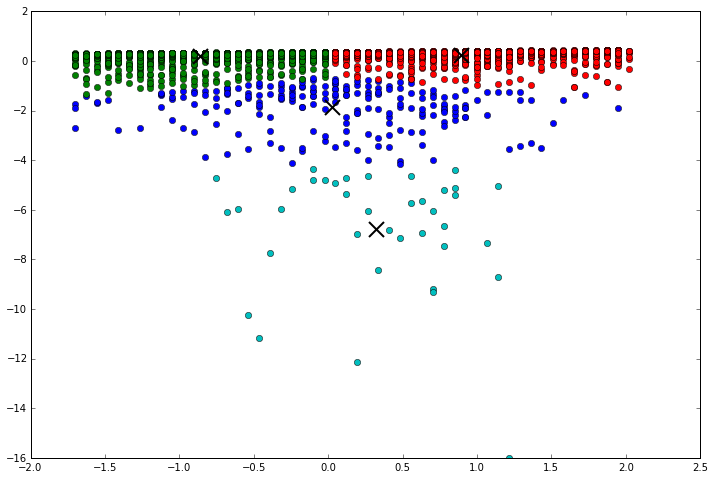

In [537]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = data[np.where(labels==i)]
    # plot the data observations
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)


In [538]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 2
Silhouette Coefficient: 0.539


In [539]:
clusters = [X[labels == i] for i in xrange(n_clusters_)]
outliers = X[labels == -1]

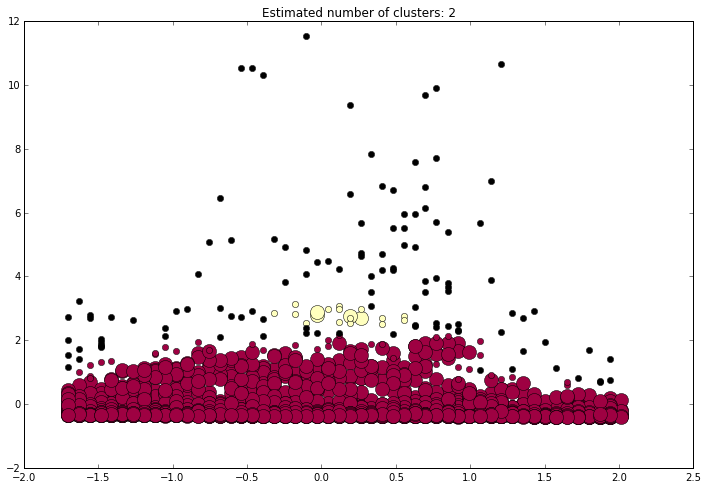

In [540]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)

In [541]:
pca.inverse_transform(clusters[1])

array([[  4.23073281e+01,   1.36217893e+09,  -4.58543779e+00,
         -1.64478868e+01,  -1.01712934e-03,  -2.00353872e-01,
         -2.94891524e-02,  -5.39368154e-02,  -4.57216053e-02,
         -1.23970667e-02,   1.15444490e-03,  -7.17705896e+00,
         -2.02282689e-02,   9.59097708e-40,  -4.00526622e-01,
         -5.19372931e-03,   1.11653668e-49,  -2.20565821e-01,
         -1.40917812e+00,  -1.08738112e-01,  -7.18168918e-02,
         -1.21754639e-02,  -1.40520062e-01,  -1.52229320e+01,
         -7.11764428e+01,  -5.51062751e-03,  -2.04183839e+00,
         -2.84960717e-01,  -7.78679567e-01,  -1.35964263e-01,
         -3.16704107e-02,  -1.33947522e-02,  -1.24844389e+02,
         -2.37245696e-01,  -3.73727010e-02,  -7.35831840e-01,
         -8.78556850e-03,  -5.65086957e-01,  -7.57103253e-01,
         -1.04739316e+01,  -4.52679940e-01,  -7.02793495e+00,
         -5.85505849e-02,  -1.07780533e+00],
       [  4.27265731e+01,   1.36485369e+09,  -3.78579961e+00,
         -1.36617453e+01,

In [542]:
pca.inverse_transform(outliers)

array([[  4.31035767e+01,   1.33862373e+09,  -3.99988739e+00, ...,
         -6.04165551e+00,  -5.06982894e-02,  -7.58190216e-01],
       [  4.19810378e+01,   1.34121222e+09,  -5.82320039e+00, ...,
         -9.20339092e+00,  -7.54755786e-02,  -1.25117715e+00],
       [  3.54080560e+01,   1.34388698e+09,  -1.69062971e+01, ...,
         -2.84388774e+01,  -2.26145788e-01,  -4.15512630e+00],
       ..., 
       [  4.21821436e+01,   1.39367213e+09,  -3.77188592e+00, ...,
         -5.57537699e+00,  -4.73444702e-02,  -1.08957384e+00],
       [  4.18808168e+01,   1.39634690e+09,  -4.19680235e+00, ...,
         -6.30955505e+00,  -5.31091694e-02,  -1.21916633e+00],
       [  4.26310935e+01,   1.42516534e+09,  -1.98263817e+00, ...,
         -2.42912934e+00,  -2.28730791e-02,  -8.47365747e-01]])

In [544]:
pd.DataFrame(np.round(pca.inverse_transform(outliers)), columns=grouped.columns).ix[11]

Admin3EN                                  43
MonthDate                         1396346898
women_Air Bombardment                     -3
women_Artillery                          -11
women_Asphyxiation                        -0
women_Beating or Stabbing                 -0
women_Burned                              -0
women_Chemical                            -0
women_Coalition Strikes                   -0
women_Crushed                             -0
women_Execution                            0
women_Gun Shot                            -5
women_ISIS                                -0
women_Mine                                 0
women_Missiles                            -0
women_Other                               -0
women_Refusal to Follow Orders             0
women_Resource Outage                     -0
women_Sniper                              -1
women_Stress                              -0
women_Torture                             -0
women_Unspecified                         -0
women_Woun

In [ ]:
do gender proportion instead of straight count